In [7]:
# imports
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the dataset
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

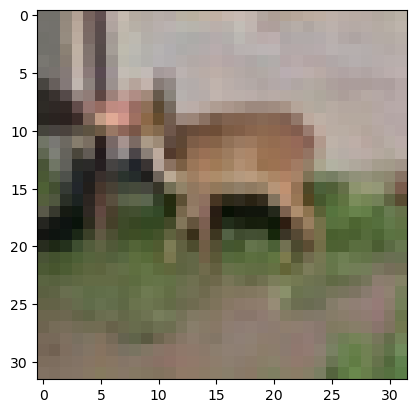

In [9]:
plt.imshow(x_test[479])

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [11]:
# preprocessing the data

#Flattening the input Images 
x_train = x_train.astype('float')/255.0  #multiplying 3 on flattening due to colored images.
x_test = x_test.astype('float')/255.0  # 3 refers 3 channels as R,G,B

# One- Hot coding labels.
y_train = to_categorical(y_train,10)  
y_test = to_categorical(y_test,10)

In [12]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(32, 32, 3),),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(32,(3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64,(3,3), activation ='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

In [13]:
# Compile the Model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
# Train the model

model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6725 - loss: 0.9571 - val_accuracy: 0.7019 - val_loss: 0.8726
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6775 - loss: 0.9625 - val_accuracy: 0.7262 - val_loss: 0.7897
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6819 - loss: 0.9340 - val_accuracy: 0.7163 - val_loss: 0.8050
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6868 - loss: 0.9184 - val_accuracy: 0.7307 - val_loss: 0.7798
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6874 - loss: 0.9102 - val_accuracy: 0.7226 - val_loss: 0.7995
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6932 - loss: 0.9023 - val_accuracy: 0.7171 - val_loss: 0.7976
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6978 - loss: 0.9014 - val_accuracy: 0.7152 - val_loss: 0.8116
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7075 - loss: 0.8748 - 

In [20]:
# Evaluating the Model

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy : {accuracy:.4f}, Loss : {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7296 - loss: 0.8125
Accuracy : 0.7288, Loss : 0.8090


In [21]:
import numpy as np
pred = model.predict(x_test)
print("Prediction for 479th image:", np.argmax(pred[479]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Prediction for 479th image: 4


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


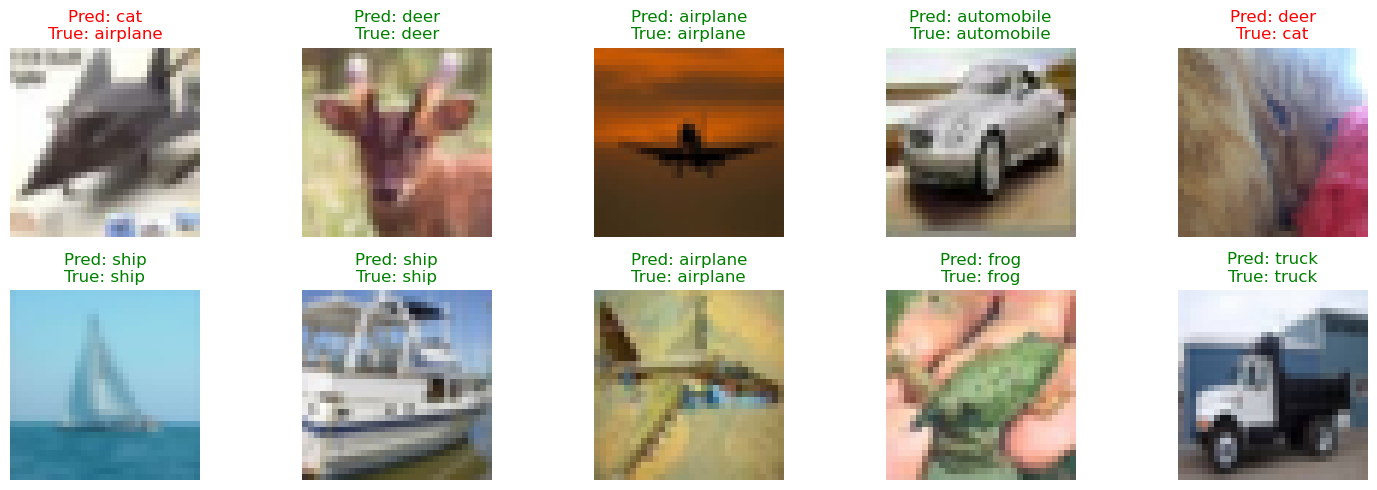

In [24]:
predictions = model.predict(x_test)

# Class labels for CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Reshape images back to (32, 32, 3) for viewing
x_test_images = x_test.reshape(-1, 32, 32, 3)

# Get predicted and true labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Set the range you want to visualize
start, end = 912, 922 # shows indices (10 images)

plt.figure(figsize=(15, 5))
for i in range(start, end):
    plt.subplot(2, 5, i - start + 1)
    plt.imshow(x_test_images[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color='green' if predicted_classes[i] == true_classes[i] else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()
